In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

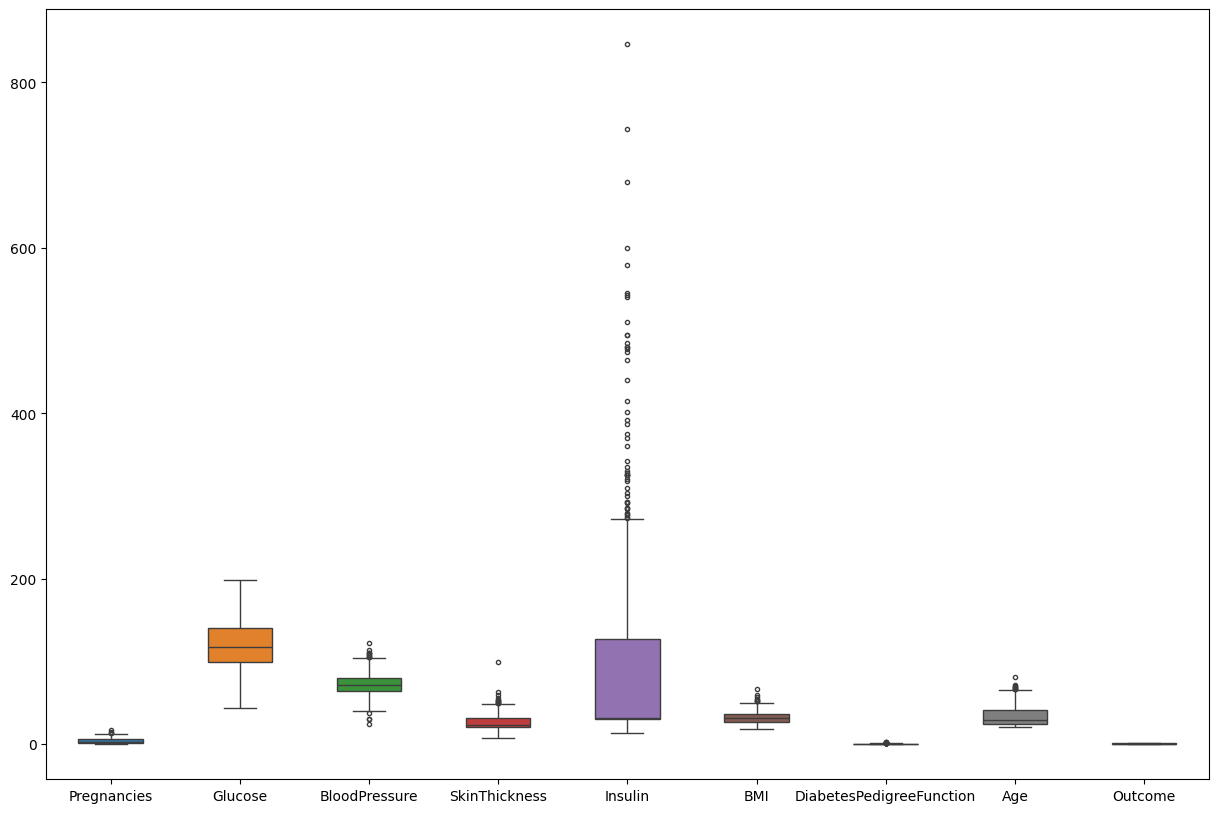

In [ ]:
fig,ax  = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,fliersize=3)

Seperating Dependant and Dependant Variables

In [ ]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

Sepearate Data in train and test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

Scaling the dataset

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [ ]:
X_test_scaled

array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
         2.78665365, -0.96584853],
       [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43304331, -1.06780314, ..., -1.03985921,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.20007091,  0.44759974, ..., -1.65633158,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13280114,  0.44759974, ..., -0.72445475,
        -0.63396981,  0.28489057]])

Decision Tree Model Training

In [ ]:
import warnings
warnings.filterwarnings('ignore')

HyperParameter Tuning

In [ ]:
parameter = {
    'criterion':['gini','entropy','log_losss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

In [ ]:
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)

In [ ]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.661 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitte

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_losss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='sqrt',splitter='random')

In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', splitter='random')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative =conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)

In [ ]:
accuracy

0.703125

In [ ]:
precision = true_positive/(true_positive+false_positive)

In [ ]:
precision

0.8846153846153846

In [ ]:
recall  = true_positive/(true_positive+false_negative)

In [ ]:
recall

0.732484076433121

In [ ]:
f1_score = 2*(recall*precision)/(recall + precision)
f1_score

0.8013937282229965

Support Vector Classifier

In [ ]:
param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.001],
    'kernel':['linear','rbf','polynomial']
}

In [ ]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.760 total time=   0.4s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.3s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.1s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.760 total time=   0.4s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.3s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

KeyboardInterrupt: 

In [ ]:
svc_clf = SVC(C=0.1,gamma=1,kernel='linear')
svc_clf.fit(X_train_scaled,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
y_pred_svc = svc_clf.predict(X_test_scaled)

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_svc)
conf_mat

array([[117,  13],
       [ 27,  35]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7916666666666666

In [ ]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [ ]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8125

In [ ]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.854014598540146

Naive Bayes

In [ ]:

#creating a function to calculate the prior probability
def calculate_prior(df, Y):
    """
    Calculate the prior probability of each outcome in the target variable.

    Parameters:
    - df: DataFrame containing the dataset.
    - Y: Name of the target variable column.

    Returns:
    - prior: List containing the prior probabilities of each outcome.
    """
    #sorted list of the outcomes 0 & 1
    classes = sorted(list(df[Y].unique()))
    #list to add the prob of outcomes in it
    prior = []
    for i in classes:
      prior.append(len(df[df[Y]==i])/len(df)) # calculating P = number of specific outcome / total number then add it to prior list
    return prior


In [ ]:

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    """
    Calculate the likelihood probability of a feature value given a specific label using Gaussian distribution.

    Parameters:
    - df: DataFrame containing the dataset.
    - feat_name: Name of the feature.
    - feat_val: Value of the feature for which to calculate the likelihood.
    - Y: Name of the target variable column.
    - label: Value of the target variable label(Outcome).

    Returns:
    - p_x_given_y: The likelihood probability of the feature value given the label.
    """
    feat = list(df.columns)
    # decreasing our sample space to be the chosen label only in order to make the probability conditional
    df = df[df[Y]==label]
    # calculating mean and standard deviation of the feature
    mean, std = df[feat_name].mean(), df[feat_name].std()
    # # Calculate the probability Density Function using the Gaussian distribution formula
    p_x_given_y = (1/ (np.sqrt(2*np.pi)*std)) * np.exp(-((feat_val-mean)**2 / (2 * std**2)))
    return p_x_given_y

In [ ]:

def naive_bayes_gaussian(df, X, Y):
  """
  Naive Bayes classifier implementation using Gaussian distribution for continuous features.

  Parameters:
  - df: DataFrame containing the training dataset.
  - X: Input features array for prediction.
  - Y: Name of the target variable column.

  Returns:
  - Y_pred: Predicted labels based on the Naive Bayes classifier.
  """
  # Extracting feature names from the DataFrame columns
  features = list(df.columns)[:-1]

  # calculate the prior probabilities
  prior = calculate_prior(df, Y)

  Y_pred = []
  # loop over every data sample
  for x in X:
    # calculate the likelihood probabilities
    labels = sorted(list(df[Y].unique()))
    likelihood = [1]*len(labels)
    for j in range(len(labels)): #iterating over 0 & 1
      for i in range(len(features)): #calculating conditional prob of each feature
        likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j]) #using independency assumptions

    # calculate posterior prob. (numerator only)
    post_prob = [1]*len(labels)
    for j in range(len(labels)):
      post_prob[j] = likelihood[j] * prior[j]
    # taking the larger between the two values of posterior probability
    Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred)



In [ ]:
train, test = train_test_split(data, test_size=.2, random_state = 41)

# Using the 'naive_bayes_gaussian' function to predict the target variable ('Outcome') using the test data
y_pred = naive_bayes_gaussian(train, X=X_test.values , Y="Outcome")

In [ ]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

# Displaying the predicted score for diabetes in female patients using the Naive Bayes model
print(classification_report(y_test, y_pred))


[[113  17]
 [ 28  34]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.67      0.55      0.60        62

    accuracy                           0.77       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



In [ ]:
accuracy_score(y_test,y_pred)

0.765625

In [ ]:
import pickle

model_and_scaler = {
    'model':svc_clf,
    'scaler':scaler
}

filename = 'diabetes_model.sav'
pickle.dump(model_and_scaler, open(filename, 'wb'))
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))['model']
loaded_scaler = pickle.load(open('diabetes_model.sav', 'rb'))['scaler']


input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_as_numpy_array = loaded_scaler.transform(input_data_reshaped)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [ ]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
